In this exercise we will select two digits from MNIST dataset: 0 and 1. For each of the obtained images we will compute one dimensional persistence homology and attempt to use it to classify those two digits. Please think why this may potentially work for this pair of digits. Name pair of digits that will be much more difficult to distinguish.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
import gudhi as gd
import gudhi.representations

from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

5


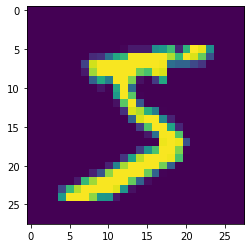

In [3]:
#Let us visualize a sample digit. 
nr = 0
im1 = X[nr].reshape(28,28)
plt.imshow(im1)
print( y[nr] )

In [4]:
first = []
second = []
for i in range (0,len(X)):
    if ( y[i] == '0' ):
        first.append( X[i] )
    else:
        if ( y[i] == '1' ):
            second.append( X[i] )

In [6]:
print(len(first))
print(len(second))

6903
7877


In [7]:
#Let us compute persistent homology of the of the obtained images:
pers = []
labs = []
for x in first:
    bcc = gd.CubicalComplex(top_dimensional_cells = x, dimensions=[28,28])
    persistence = bcc.persistence()
    p = bcc.persistence_intervals_in_dimension(0)
    #We need to remove the infinite interval - as it is always last, we remove the last row
    p = p[0:len(p)-1,:]
    pers.append( p )
    labs.append(0)
    
for x in second:
    bcc = gd.CubicalComplex(top_dimensional_cells = x, dimensions=[28,28])
    persistence = bcc.persistence()
    p = bcc.persistence_intervals_in_dimension(0) 
    #We need to remove the infinite interval - as it is always last, we remove the last row
    p = p[0:len(p)-1,:]
    pers.append( p )
    labs.append(1)

In [8]:
#Let us vectorize all the persistence using persistence images. 
nr_of_pixels = 20
PI = gd.representations.PersistenceImage(bandwidth=50, weight=lambda x: x[1]**2, 
im_range=[0,256,0,256], resolution=[nr_of_pixels,nr_of_pixels])
vectorized = []
for p in pers:
    pi = PI.fit_transform([p])
    pi = pi.reshape( nr_of_pixels*nr_of_pixels )
    vectorized.append( pi )

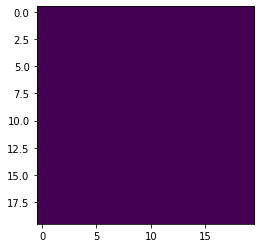

In [9]:
#Here we can take a look at our persistence images:
nr_of_persistence_image = 12000
plt.imshow(np.flip(np.reshape(vectorized[nr_of_persistence_image], [nr_of_pixels,nr_of_pixels]), 0))

In [10]:
#Spiit the data for train and test
X_train, X_test, y_train, y_test = train_test_split( vectorized, labs, test_size=0.4, random_state=0)

print( np.shape(X_train) )

(8868, 400)


In [11]:
#Let us run very basic SVN on our data!
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9697225981055481

As you may observe, the classification works very well for digits like:
0 vs 1,2,3,5,7,8 as well as 
8 vs digits that do not happen to enclose a nontrivial cycle. 
Zero dimensional persistence homology we use here capture exactly this phenomena. 
Hovewer, if we consider digit 1 vs digit 2, this is not the case anymore and the results of classification
are considerably worst.